# Demonstration of MCE IRL code & environments

This is just tabular environments & vanilla MCE IRL.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import copy

import numpy as np
import seaborn as sns
import pandas as pd
import jax.experimental.optimizers as jaxopt
import matplotlib.pyplot as plt
import scipy

import imitation.tabular_irl as tirl
import imitation.examples.model_envs as menv

sns.set(context='notebook')

np.random.seed(42)

# IRL on a random MDP

Testing both linear reward models & MLP reward models.

In [2]:
mdp = menv.RandomMDP(
    n_states=16,
    n_actions=3,
    branch_factor=2,
    horizon=10,
    random_obs=True,
    obs_dim=5,
    generator_seed=42)
V, Q, pi = tirl.mce_partition_fh(mdp)
Dt, D = tirl.mce_occupancy_measures(mdp, pi=pi)
demo_counts = D @ mdp.observation_matrix
obs_dim, = demo_counts.shape

In [3]:
rmodel = tirl.LinearRewardModel(obs_dim)
opt = jaxopt.sgd(0.1)
final_weights, D_fake = tirl.mce_irl(
    mdp, opt, rmodel, D, linf_eps=1e-1)

INFO:tensorflow:Occupancy measure error@iter   0: 2.195323 (||params||=1.872485, ||grad||=35.039443, ||E[dr/dw]||=29.571607)
INFO:tensorflow:Occupancy measure error@iter  100: 0.730435 (||params||=2.773188, ||grad||=4.941470, ||E[dr/dw]||=15.409534)


In [4]:
rmodel = tirl.MLPRewardModel(obs_dim, [32, 32])
opt = jaxopt.sgd(0.1)
final_weights, D_fake = tirl.mce_irl(
    mdp, opt, rmodel, D, linf_eps=1e-2)

/home/sam/.virtualenvs/ray-irl/lib/python3.6/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


INFO:tensorflow:Occupancy measure error@iter   0: 1.072536 (||params||=9.067028, ||grad||=15.974791, ||E[dr/dw]||=35.351801)
INFO:tensorflow:Occupancy measure error@iter  100: 0.121608 (||params||=9.682549, ||grad||=0.675209, ||E[dr/dw]||=19.512968)
INFO:tensorflow:Occupancy measure error@iter  200: 0.073882 (||params||=9.689708, ||grad||=0.409328, ||E[dr/dw]||=19.594937)
INFO:tensorflow:Occupancy measure error@iter  300: 0.050178 (||params||=9.693851, ||grad||=0.276519, ||E[dr/dw]||=19.664320)
INFO:tensorflow:Occupancy measure error@iter  400: 0.037148 (||params||=9.696279, ||grad||=0.204107, ||E[dr/dw]||=19.712589)
INFO:tensorflow:Occupancy measure error@iter  500: 0.027826 (||params||=9.697656, ||grad||=0.152701, ||E[dr/dw]||=19.743426)
INFO:tensorflow:Occupancy measure error@iter  600: 0.020975 (||params||=9.698400, ||grad||=0.115077, ||E[dr/dw]||=19.763492)
INFO:tensorflow:Occupancy measure error@iter  700: 0.016318 (||params||=9.698766, ||grad||=0.089549, ||E[dr/dw]||=19.776120)


# Same thing, but on grid world

The true reward here is not linear in the reduced feature space (i.e $(x,y)$ coordinates). Finding an appropriate linear reward is impossible (as I will demonstration), but an MLP should Just Work(tm).

INFO:tensorflow:Occupancy measure error@iter   0: 1.745107 (||params||=1.584085, ||grad||=3.627531, ||E[dr/dw]||=4.315728)
INFO:tensorflow:Occupancy measure error@iter  100: 1.171931 (||params||=13.676869, ||grad||=0.015060, ||E[dr/dw]||=5.177702)
INFO:tensorflow:Occupancy measure error@iter  200: 1.157843 (||params||=16.845171, ||grad||=0.006587, ||E[dr/dw]||=5.179402)
INFO:tensorflow:Occupancy measure error@iter  300: 1.152460 (||params||=19.078518, ||grad||=0.003681, ||E[dr/dw]||=5.181941)
INFO:tensorflow:Occupancy measure error@iter  400: 1.149673 (||params||=20.637403, ||grad||=0.002185, ||E[dr/dw]||=5.183245)
INFO:tensorflow:Occupancy measure error@iter  500: 1.148083 (||params||=21.730349, ||grad||=0.001336, ||E[dr/dw]||=5.183971)
INFO:tensorflow:Occupancy measure error@iter  600: 1.147135 (||params||=22.494141, ||grad||=0.000826, ||E[dr/dw]||=5.184425)
INFO:tensorflow:Occupancy measure error@iter  700: 1.146542 (||params||=23.021441, ||grad||=0.000508, ||E[dr/dw]||=5.184704)
IN

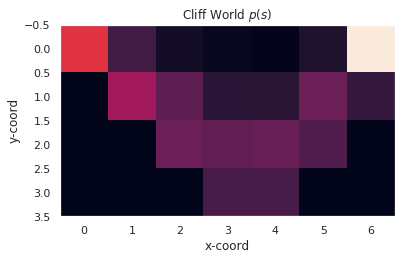

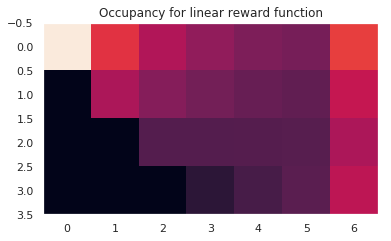

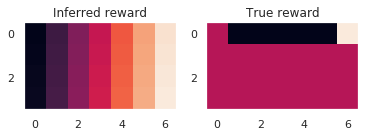

In [5]:
# Same experiments, but on grid world
mdp = menv.CliffWorld(
    width=7,
    height=4,
    horizon=8,
    use_xy_obs=True)
V, Q, pi = tirl.mce_partition_fh(mdp)
Dt, D = tirl.mce_occupancy_measures(mdp, pi=pi)
demo_counts = D @ mdp.observation_matrix
obs_dim, = demo_counts.shape
rmodel = tirl.LinearRewardModel(obs_dim)
opt = jaxopt.adam(1)
final_weights, D_fake = tirl.mce_irl(
    mdp, opt, rmodel, D, linf_eps=0.1)

mdp.draw_value_vec(D)
plt.title("Cliff World $p(s)$")
plt.xlabel('x-coord')
plt.ylabel('y-coord')
plt.show()

mdp.draw_value_vec(D_fake)
plt.title("Occupancy for linear reward function")
plt.show()
plt.subplot(1, 2, 1)
mdp.draw_value_vec(rmodel.out(mdp.observation_matrix))
plt.title("Inferred reward")
plt.subplot(1, 2, 2)
mdp.draw_value_vec(mdp.reward_matrix)
plt.title("True reward")
plt.show()

INFO:tensorflow:Occupancy measure error@iter   0: 1.734397 (||params||=3.449511, ||grad||=7.148362, ||E[dr/dw]||=13.251150)
INFO:tensorflow:Occupancy measure error@iter  250: 0.529508 (||params||=7.678983, ||grad||=0.927677, ||E[dr/dw]||=38.457544)
INFO:tensorflow:Occupancy measure error@iter  500: 0.180323 (||params||=10.340317, ||grad||=0.393961, ||E[dr/dw]||=49.261944)
INFO:tensorflow:Occupancy measure error@iter  750: 0.093852 (||params||=12.058593, ||grad||=0.134416, ||E[dr/dw]||=55.326062)
INFO:tensorflow:Occupancy measure error@iter  1000: 0.061583 (||params||=13.251996, ||grad||=0.093111, ||E[dr/dw]||=58.944864)
INFO:tensorflow:Occupancy measure error@iter  1250: 0.041767 (||params||=14.235092, ||grad||=0.070250, ||E[dr/dw]||=61.463325)


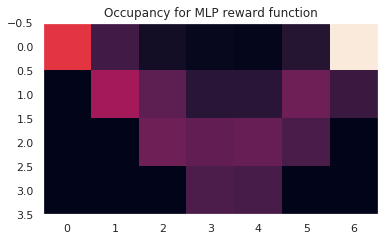

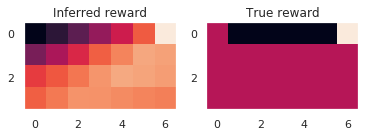

In [6]:
rmodel = tirl.MLPRewardModel(obs_dim, [1024,], activation='Relu')
opt = jaxopt.adam(1e-3)
final_weights, D_fake_mlp = tirl.mce_irl(
    mdp, opt, rmodel, D, linf_eps=3e-2, print_interval=250)
mdp.draw_value_vec(D_fake_mlp)
plt.title("Occupancy for MLP reward function")
plt.show()
plt.subplot(1, 2, 1)
mdp.draw_value_vec(rmodel.out(mdp.observation_matrix))
plt.title("Inferred reward")
plt.subplot(1, 2, 2)
mdp.draw_value_vec(mdp.reward_matrix)
plt.title("True reward")
plt.show()

Notice that the inferred reward is absolutely nothing like the true reward, but the occupancy measure still (roughly) matches the true occupancy measure.